In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("Wholesale customers data.csv");

print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [4]:
df.drop(['Channel','Region'],axis=1,inplace=True)# we can drop these columns as we dont need them

In [5]:
array=df.values

In [6]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [7]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [8]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [9]:
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [26]:
#dbscan = DBSCAN(eps=0.8, min_samples=6)#minpts >= D+1(d is no. of columns eps should be 1 tp 30% to get minimal outliers if more outliers increase eps)
dbscan = DBSCAN(eps=0.8, min_samples=7)
#dbscan = DBSCAN(eps=0.3, min_samples=7)# gives more outlier so incraese eps
#dbscan = DBSCAN(eps=0.7, min_samples=7)
#dbscan = DBSCAN(eps=1.0, min_samples=7)
#dbscan = DBSCAN(eps=2.0, min_samples=7)# as eps is incraeses outliers will be reduced and large daytapoints in one cluseter
#dbscan = DBSCAN(eps=3.0, min_samples=7)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=7)

In [27]:
#Noisy samples are given the label -1. -1 are outliers
dbscan.labels_

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [28]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [29]:
cl

,cluster
0,0
1,0
2,-1
3,0
4,-1
...,...
435,-1
436,0
437,-1
438,0


In [38]:
df = pd.concat([df,cl],axis=1).reindex()

In [49]:
list(np.where(df.cluster == -1))#list of outliers

[array([  2,   4,  12,  17,  22,  23,  24,  28,  33,  39,  40,  45,  47,
         49,  56,  61,  65,  71,  77,  85,  86,  87,  92,  93, 100, 103,
        109, 125, 141, 142, 145, 163, 165, 171, 176, 181, 183, 196, 201,
        202, 209, 211, 216, 218, 228, 239, 251, 253, 254, 258, 259, 265,
        277, 282, 284, 304, 309, 312, 319, 325, 331, 333, 338, 343, 351,
        357, 358, 372, 376, 382, 384, 403, 409, 411, 413, 425, 427, 430,
        431, 435, 437], dtype=int64)]

In [51]:
df.iloc[2]

Fresh               6353
Milk                8808
Grocery             7684
Frozen              2405
Detergents_Paper    3516
Delicassen          7844
cluster               -1
Name: 2, dtype: int64

In [53]:
df.cluster.unique()

array([ 0, -1], dtype=int64)

As this forms only one cluster and another is outliers(-1) soit is not a appropriate method for this dataset to use dbscan.
we can use dbscan to identify outluers and later once we drop that outliers we can use kmeans to find the cluster
or we can also use the regression method to proceed further where we use cooks distanvce to find the outlier


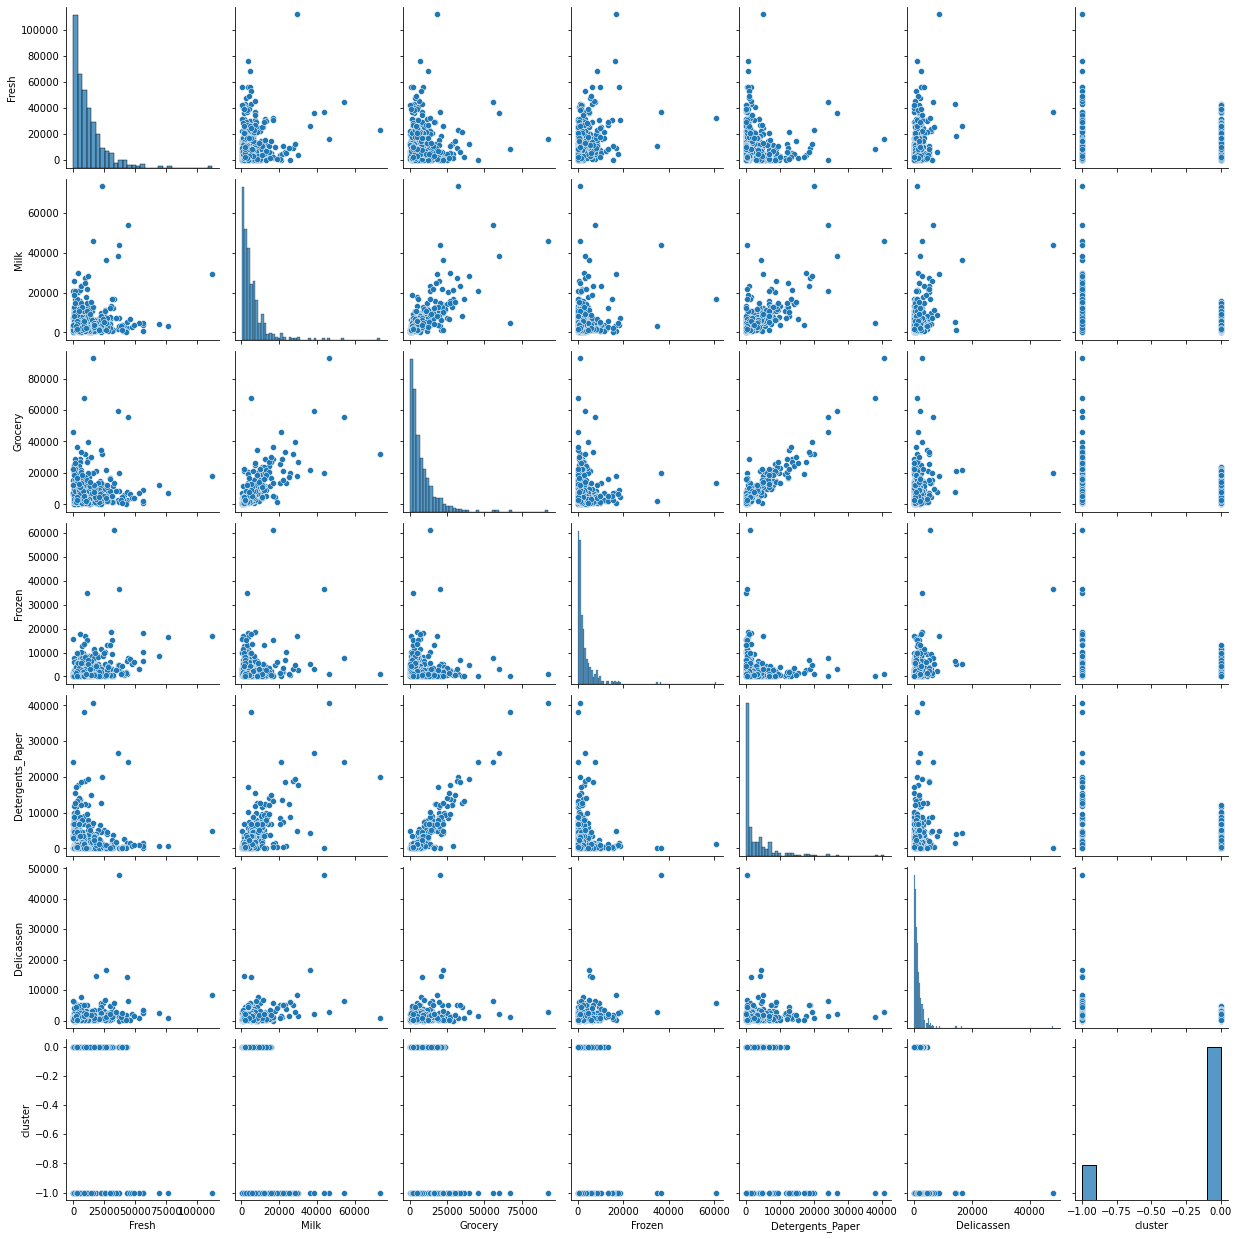

In [54]:
import seaborn as sns
sns.pairplot(df)# non linear data